In [ ]:
!pip install pymysql

In [ ]:
import pymysql

In [4]:
# sql 서버 정보를 입력
_db = pymysql.connect(
    user = 'root', 
    password = 'java', 
    host = 'localhost', 
    db = 'os', 
    port = 3306
)

In [5]:
# cursor 생성
cursor = _db.cursor()

cursor2 = _db.cursor(pymysql.cursors.DictCursor)

In [7]:
sql = """
    SELECT 
    * 
    FROM 
    offline
"""

In [8]:
cursor.execute(sql)
cursor2.execute(sql)

1213

In [9]:
result = cursor.fetchall()
result2 = cursor2.fetchall()

In [ ]:
result

In [ ]:
result2

In [12]:
import pandas as pd

In [14]:
pd.DataFrame(result2)

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7600
1,201901,백화점,1,10,379,19458720
2,201901,백화점,1,80,11198,1186133303
3,201901,백화점,1,90,468,29194852
4,201901,백화점,2,0,2,128200
...,...,...,...,...,...,...
1208,202109,편의점,2,10,2115,14879960
1209,202109,편의점,2,60,243768,1997441975
1210,202109,편의점,2,70,40523,352420260
1211,202109,편의점,2,80,6349,53334882


### 문제 
1. 데이터베이스에 있는 offline 테이블을 로드하여 데이터프레임으로 변환
2. 데이터프레임의 컬럼의 이름을 변경 -> ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
3. 기준년월 컬럼의 데이터의 타입을 시계열 데이터로 변경
4. 데이터베이스에 있는 online 테이블을 로드하여 데이터프레임으로 변환
5. 온라인 데이터프레임에 컬럼의 이름을 ['기준년월', '성별', '연령대', '총이용건수', '총이용금액'] 변경
6. 파생변수('업종') 생성하여 데이터는 '온라인' 대입
7. 온라인 데이터프레임의 기준년월 데이터 타입을 시계열로 변경
7. 두개의 데이터프레임을 단순 행 결합 
8. 기준년월, 업종 별로 그룹화 하여 총 이용금액의 합계를 출력하고 라인 그래프로 시각화

In [2]:
!pip install pymysql

  Obtaining dependency information for pymysql from https://files.pythonhosted.org/packages/e5/30/20467e39523d0cfc2b6227902d3687a16364307260c75e6a1cb4422b0c62/PyMySQL-1.1.0-py3-none-any.whl.metadata
Using cached PyMySQL-1.1.0-py3-none-any.whl (44 kB)


In [3]:
#mysql과 연동시키는 라이브러리 로드
import pymysql

In [4]:
#sql server와 연결
_db = pymysql.connect(
    host='localhost',
    user='root',
    password='java',
    db='os',
    port=3306
)

In [5]:
cursor = _db.cursor(pymysql.cursors.DictCursor)

In [6]:
#select 쿼리문 작성
sql = """
    SELECT
    *
    FROM
    offline
"""

cursor.execute(sql)

# select의 결과를 data1 변수에 대입
data1 = cursor.fetchall()

print(data1)


[{'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 1, 'agegrp_dc': 1, 'tco_btc_u_ct': 1, 'tco_btc_u_am': 7600}, {'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 1, 'agegrp_dc': 10, 'tco_btc_u_ct': 379, 'tco_btc_u_am': 19458720}, {'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 1, 'agegrp_dc': 80, 'tco_btc_u_ct': 11198, 'tco_btc_u_am': 1186133303}, {'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 1, 'agegrp_dc': 90, 'tco_btc_u_ct': 468, 'tco_btc_u_am': 29194852}, {'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 2, 'agegrp_dc': 0, 'tco_btc_u_ct': 2, 'tco_btc_u_am': 128200}, {'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 2, 'agegrp_dc': 1, 'tco_btc_u_ct': 9, 'tco_btc_u_am': 269780}, {'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 2, 'agegrp_dc': 10, 'tco_btc_u_ct': 1168, 'tco_btc_u_am': 65231910}, {'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 2, 'agegrp_dc': 80, 'tco_btc_u_ct': 17043, 'tco_btc_u_am': 1922992702}, {'crym': 201901, 'tco_btc_nm': '백화점', 'ma_fem_dc': 2, '

In [7]:
import pandas as pd

In [9]:
offline = pd.DataFrame(data1)

offline.head(1)

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7600


In [ ]:
#컬럼의 이름을 변경

offline.rename(
    columns={
        'crym' : '기준년월',
        'tco_btc_nm' : '업종',
        'ma_fem_dc' : '성별',
        'agegrp_dc' : '연령대',
        'tco_btc_u_ct' : '총이용건수',
        'tco_btc_u_am' : '총이용금액'
    }
)

In [13]:
offline.columns

Index(['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액'], dtype='object')

In [12]:
offline.columns = ['기준년월','업종','성별','연령대','총이용건수','총이용금액']

In [14]:
offline.head(1)

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7600


In [16]:
#데이터의 타입 변경 -> 시계열데이터로 변경
# to_datetime( 스리즈형태의 데이터, format = {변경시킬 데이터의 형태} )
# pandas 내부에 있는 함수
offline['기준년월'] = pd.to_datetime(offline['기준년월'], format='%Y%m')

In [17]:
offline.head(1)

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,1,1,1,7600


In [18]:
# online table 에 데이터를 로드
sql = """
    SELECT
    *
    FROM
    online
"""

cursor.execute(sql)

data2 = cursor.fetchall()
print(data2)

[{'crym': 201901, 'ma_fem_dc': 1, 'agegrp_dc': 1, 'tco_btc_u_ct': 1, 'tco_btc_u_am': 110685}, {'crym': 201901, 'ma_fem_dc': 1, 'agegrp_dc': 10, 'tco_btc_u_ct': 2333, 'tco_btc_u_am': 98108225}, {'crym': 201901, 'ma_fem_dc': 1, 'agegrp_dc': 80, 'tco_btc_u_ct': 5632, 'tco_btc_u_am': 607601993}, {'crym': 201901, 'ma_fem_dc': 1, 'agegrp_dc': 90, 'tco_btc_u_ct': 196, 'tco_btc_u_am': 21542552}, {'crym': 201901, 'ma_fem_dc': 2, 'agegrp_dc': 0, 'tco_btc_u_ct': 1, 'tco_btc_u_am': 1000}, {'crym': 201901, 'ma_fem_dc': 2, 'agegrp_dc': 10, 'tco_btc_u_ct': 3671, 'tco_btc_u_am': 153291754}, {'crym': 201901, 'ma_fem_dc': 2, 'agegrp_dc': 80, 'tco_btc_u_ct': 8817, 'tco_btc_u_am': 842508577}, {'crym': 201901, 'ma_fem_dc': 2, 'agegrp_dc': 90, 'tco_btc_u_ct': 147, 'tco_btc_u_am': 12058915}, {'crym': 201902, 'ma_fem_dc': 1, 'agegrp_dc': 10, 'tco_btc_u_ct': 1950, 'tco_btc_u_am': 85255299}, {'crym': 201902, 'ma_fem_dc': 1, 'agegrp_dc': 80, 'tco_btc_u_ct': 4874, 'tco_btc_u_am': 542666730}, {'crym': 201902, 'ma_

In [19]:
online = pd.DataFrame(data2)
online.head(1)

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,1,1,1,110685


In [20]:
online.columns = ['기준년월','성별','연령대','총이용건수','총이용금액']
online.head(1)

,기준년월,성별,연령대,총이용건수,총이용금액
0,201901,1,1,1,110685


In [21]:
# 파생변수 (업종) 생성 -> 데이터는 '온라인' 대입
online['업종'] = '온라인'
online.head(3)

,기준년월,성별,연령대,총이용건수,총이용금액,업종
0,201901,1,1,1,110685,온라인
1,201901,1,10,2333,98108225,온라인
2,201901,1,80,5632,607601993,온라인


In [23]:
online['기준년월'] = pd.to_datetime(online['기준년월'],format='%Y%m')

In [24]:
online.head(3)

,기준년월,성별,연령대,총이용건수,총이용금액,업종
0,2019-01-01,1,1,1,110685,온라인
1,2019-01-01,1,10,2333,98108225,온라인
2,2019-01-01,1,80,5632,607601993,온라인


In [26]:
# concat([데이터프레임1,데이터프레임2, ...], axis={0 ('rows') | 1 ('columns')}, ignore_index = bool )
# pandas 내부 함수
df = pd.concat([offline , online], axis=0 , ignore_index=True)

In [27]:
df.head(3)

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,1,1,1,7600
1,2019-01-01,백화점,1,10,379,19458720
2,2019-01-01,백화점,1,80,11198,1186133303


In [32]:
#그룹화 groupby
# df.groupby(['기준년월','업종']).sum()['총이용금액']
# df.groupby(['기준년월','업종']).sum()[['총이용금액']]
group_data = df[ ['기준년월','업종','총이용금액'] ].groupby(['기준년월','업종']).sum()

In [60]:
#그룹화 pivot_table() 
#pandas 내부 함수
# pivot_data = pd.pivot_table(
#     df,
#     index= '기준년월',
#     columns= '업종',
#     values= '총이용금액',
#     aggfunc= 'mean'
# )

pivot_data=pd.pivot_table(
    df,
    index= '기준년월',
    columns= '업종',
    values= '총이용금액',
    aggfunc= 'mean'
)

In [41]:
import matplotlib.pyplot as plt

In [42]:
import platform

In [44]:
if platform.system() == 'Darwin' : #mac인경우
    plt.rc('font', family = 'AppleGothic')
else :
    plt.rc('font', family = 'Malgun Gothic')

<Axes: xlabel='기준년월,업종'>

c:\Users\eungok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from current font.
  func(*args, **kwargs)
c:\Users\eungok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
c:\Users\eungok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  func(*args, **kwargs)
c:\Users\eungok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
c:\Users\eungok\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  func(*

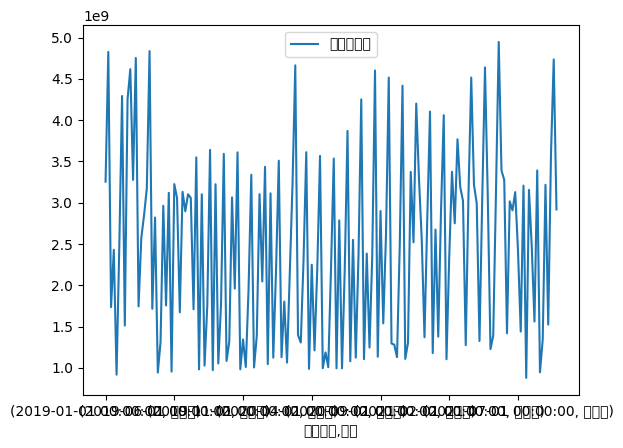

In [43]:
group_data.plot()

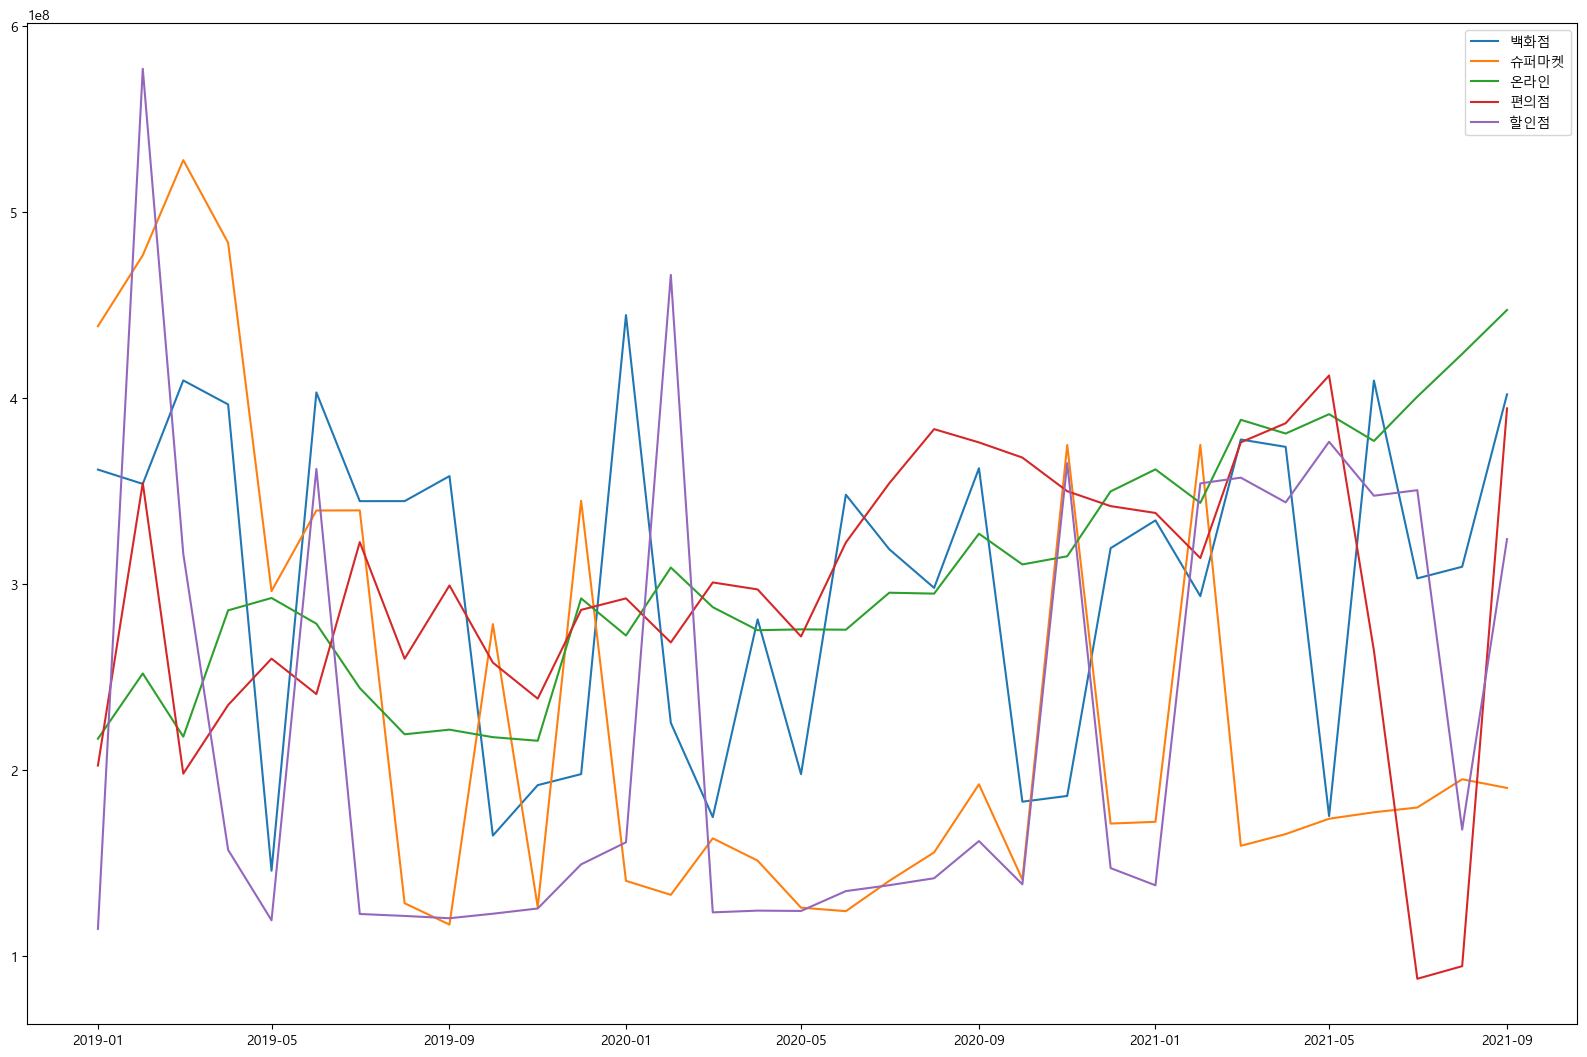

In [61]:
plt.figure(figsize=(20,13))

for col in pivot_data.columns:
    plt.plot(pivot_data[col], label=col)

plt.legend()
plt.show()